In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('training_data.csv')
data.head()

,id,text,class,volunteers_count,judgment_confidence
0,366,i would not feel hesitant in using the medical...,4,3.0,0.917835
1,9003,i try to stuff my wildly feeling heart and mes...,0,3.0,0.788853
2,16632,i just need to find ways to feel pretty,1,4.0,0.852762
3,2199,i think the protection part is the part where ...,0,4.0,0.793927
4,3079,im feeling mellow and am enjoying the cooler w...,1,4.0,0.953162


In [60]:
data.drop(['volunteers_count','judgment_confidence'],axis=1, inplace=True)

In [61]:
data.isna().sum()

,0
id,0
text,0
class,0


In [62]:
data.shape

(15464, 3)

<Axes: xlabel='class'>

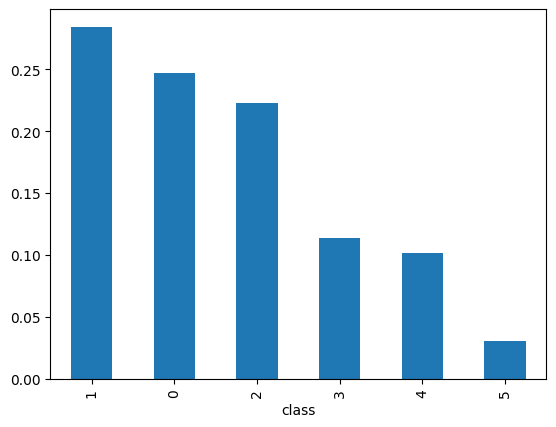

In [63]:
data['class'].value_counts(normalize = True).plot.bar()

In [64]:
data = data[data['class'] != 5]


<Axes: xlabel='class'>

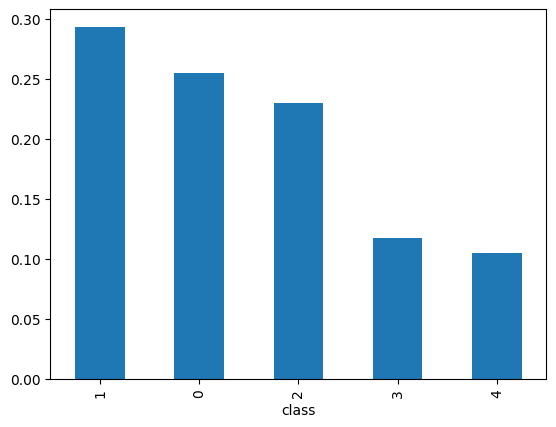

In [65]:
data['class'].value_counts(normalize = True).plot.bar()

In [66]:
# text preprocessing




# download nltk

import nltk

nltk.download('all')




# create a list text

text = list(data['text'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

data['text'] = corpus

data.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

,id,text,class
0,366,would feel hesitant using medical system needed,4
1,9003,try stuff wildly feeling heart messy inside sa...,0
2,16632,need find way feel pretty,1
3,2199,think protection part part feel abused reason ...,0
4,3079,im feeling mellow enjoying cooler weather,1


In [67]:
X = data['text']
y = data['class']

In [68]:
# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (10044,)
Testing Data :  (4948,)


In [69]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(10044, 14675)

In [70]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)




# generate predictions

predictions = lr.predict(X_test_cv)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 1, 2, 4])

In [71]:
# Load the submission file
submission_df = pd.read_csv('submission_file.csv')
testing_df = pd.read_csv('testing_data.csv')

In [72]:
submission_df.head()

,id,class
0,8846,NaN
1,10369,NaN
2,16112,NaN
3,13646,NaN
4,651,NaN


In [73]:
testing_df.head()

,id,text,volunteers_count,judgment_confidence
0,8846,RT @DNAinfoCHI: The new nature area replacing ...,3.0,1.000000
1,10369,i feel very triumphant when ive found s,3.0,0.839630
2,16112,i feel ive been beaten down by the words of me...,3.0,0.924088
3,13646,i thought how great it must feel for the autho...,3.0,0.890124
4,651,RT @Yankees: .@DRob30 comes in to close out th...,3.0,1.000000


In [74]:
# Transform X_sub using the fitted CountVectorizer
X_sub_cv = cv.transform(testing_df['text'])

# Generate predictions on X_sub
predictions_sub = lr.predict(X_sub_cv)

# Now predictions_sub contains the predicted labels for the unlabeled data X_sub
print(predictions_sub)


[2 1 3 ... 2 1 1]


In [75]:
# Insert the predicted values into the 'class' column
submission_df['class'] = predictions_sub

In [76]:
# Save the updated submission file
submission_df.to_csv('submissionfile_edited1.csv', index=False)

In [77]:
# confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['0','1','2','3','4'], columns=['0','1','2','3','4'])

df

,0,1,2,3,4
0,1187,23,6,29,12
1,26,1407,11,7,8
2,2,6,1101,1,0
3,45,19,15,496,4
4,40,18,13,21,451


In [78]:
from sklearn.metrics import accuracy_score


In [79]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9381568310428456


In [80]:
td = pd.read_csv('testing_data.csv')
td.head()

,id,text,volunteers_count,judgment_confidence
0,8846,RT @DNAinfoCHI: The new nature area replacing ...,3.0,1.000000
1,10369,i feel very triumphant when ive found s,3.0,0.839630
2,16112,i feel ive been beaten down by the words of me...,3.0,0.924088
3,13646,i thought how great it must feel for the autho...,3.0,0.890124
4,651,RT @Yankees: .@DRob30 comes in to close out th...,3.0,1.000000


In [81]:
td.shape

(3395, 4)

In [82]:
td.drop(['volunteers_count','judgment_confidence'],axis=1, inplace=True)

In [83]:
td.isna().sum()

,0
id,0
text,0


In [84]:
td.shape

(3395, 2)

In [85]:
# create a list text

textd = list(td['text'])

In [86]:
# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(textd)):

    r = re.sub('[^a-zA-Z]', ' ', textd[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

td['text'] = corpus
td.head()


,id,text
0,8846,rt dnainfochi new nature area replacing indian...
1,10369,feel triumphant ive found
2,16112,feel ive beaten word men ground cant sleep ben...
3,13646,thought great must feel author created story p...
4,651,rt yankee drob come close game th yankee


In [87]:
X_sub = td['text']

In [88]:
print(X_sub.shape)

(3395,)


In [89]:
cv = CountVectorizer()


In [90]:
# Fit CountVectorizer with training data
cv.fit(X_train)

# Transform test data
X_test_sb = cv.transform(X_sub)

In [91]:
predicted_values = lr.predict(X_test_sb)

In [92]:
print(predicted_values)

[2 1 3 ... 2 1 1]


In [93]:
# Load the submission file
submission_df = pd.read_csv('submission_file.csv')

In [94]:
# Insert the predicted values into the 'class' column
submission_df['class'] = predicted_values

In [95]:
# Save the updated submission file
submission_df.to_csv('submissionfile_edited2.csv', index=False)